In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
   
from functools import reduce

In [38]:
# dataframe = df
df=pd.read_csv('tendulkar_ODI.csv')

In [39]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [40]:
df.shape

(295, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        295 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


In [42]:
# check missing values
df.isnull()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,False,False,False,False,False,False,False,False,False,False,False,False,False
291,False,False,False,False,False,False,False,False,False,False,False,False,False
292,False,False,False,False,False,False,False,False,False,False,False,False,False
293,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
# check non missing values
df.notnull()
df.info()
df['Runs','4s'][:5,:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        295 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


KeyError: ('Runs', '4s')

In [54]:
# check if there's any missing value in dataframe
df.isnull().values.any()

False

In [55]:
df.shape

(295, 13)

0      False
1      False
2      False
3      False
4      False
       ...  
290    False
291    False
292    False
293    False
294    False
Name: Runs, Length: 295, dtype: bool


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: Runs, dtype: bool

0       0
1       0
2      36
3      19
4      31
5      36
6      53
7      30
8     NaN
9       4
10     53
11     62
12      4
13      1
14     36
Name: Runs, dtype: object

In [58]:
df['Runs']=df['Runs'].replace('DNB',np.nan)

In [59]:
df.head(15)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,NaN,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [60]:
df['Runs']

0        0
1        0
2       36
3       19
4       31
      ... 
290     18
291      2
292      3
293     14
294    114
Name: Runs, Length: 295, dtype: object

In [61]:
df['Runs'][0]

'0'

In [62]:
df['Runs'].head(5)

0     0
1     0
2    36
3    19
4    31
Name: Runs, dtype: object

In [63]:
df.head()

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  295 non-null    int64 
 1   Runs        293 non-null    object
 2   Mins        295 non-null    object
 3   BF          295 non-null    object
 4   4s          295 non-null    object
 5   6s          295 non-null    object
 6   SR          295 non-null    object
 7   Pos         295 non-null    object
 8   Dismissal   295 non-null    object
 9   Inns        295 non-null    object
 10  Opposition  295 non-null    object
 11  Ground      295 non-null    object
 12  Start Date  295 non-null    object
dtypes: int64(1), object(12)
memory usage: 30.1+ KB


In [65]:
df.shape

(295, 13)

In [66]:
df.head(15)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,NaN,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [85]:
for i,r in df['Runs']:
    print(r)
    print(i)
    if '*' not in a:
        continue
    else:
        run = reduce(lambda s, sub: s.replace(sub,""),'*',str(r))
        r =int(run)

ValueError: not enough values to unpack (expected 2, got 1)

In [84]:
for r in df['Runs']:
    a=str(r)
    if '*' in a:
        print(r)

82*
8*
26*
28*
11*
127*
65*
82*
100*
127*
186*
70*
87*
34*
67*
100*
117*
163*
96*
200*


In [86]:
df.shape

(295, 13)

In [87]:
df['Runs'] = df['Runs'].str.replace('*', '')

In [88]:
df.head(50)

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
5,6,36,-,22,3,2,163.63,5,bowled,1,v Sri Lanka,Nagpur,1-Dec-90
6,7,53,-,41,7,1,129.26,5,bowled,2,v Sri Lanka,Pune,5-Dec-90
7,8,30,-,29,1,2,103.44,5,caught,1,v Sri Lanka,Margao,8-Dec-90
8,9,NaN,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25-Dec-90
9,10,4,-,11,0,0,36.36,5,lbw,2,v Sri Lanka,Cuttack,28-Dec-90


In [96]:
df['4s'] = df['4s'].str.replace('-', 0)

TypeError: repl must be a string or callable

TypeError: could not convert string to float: '-'

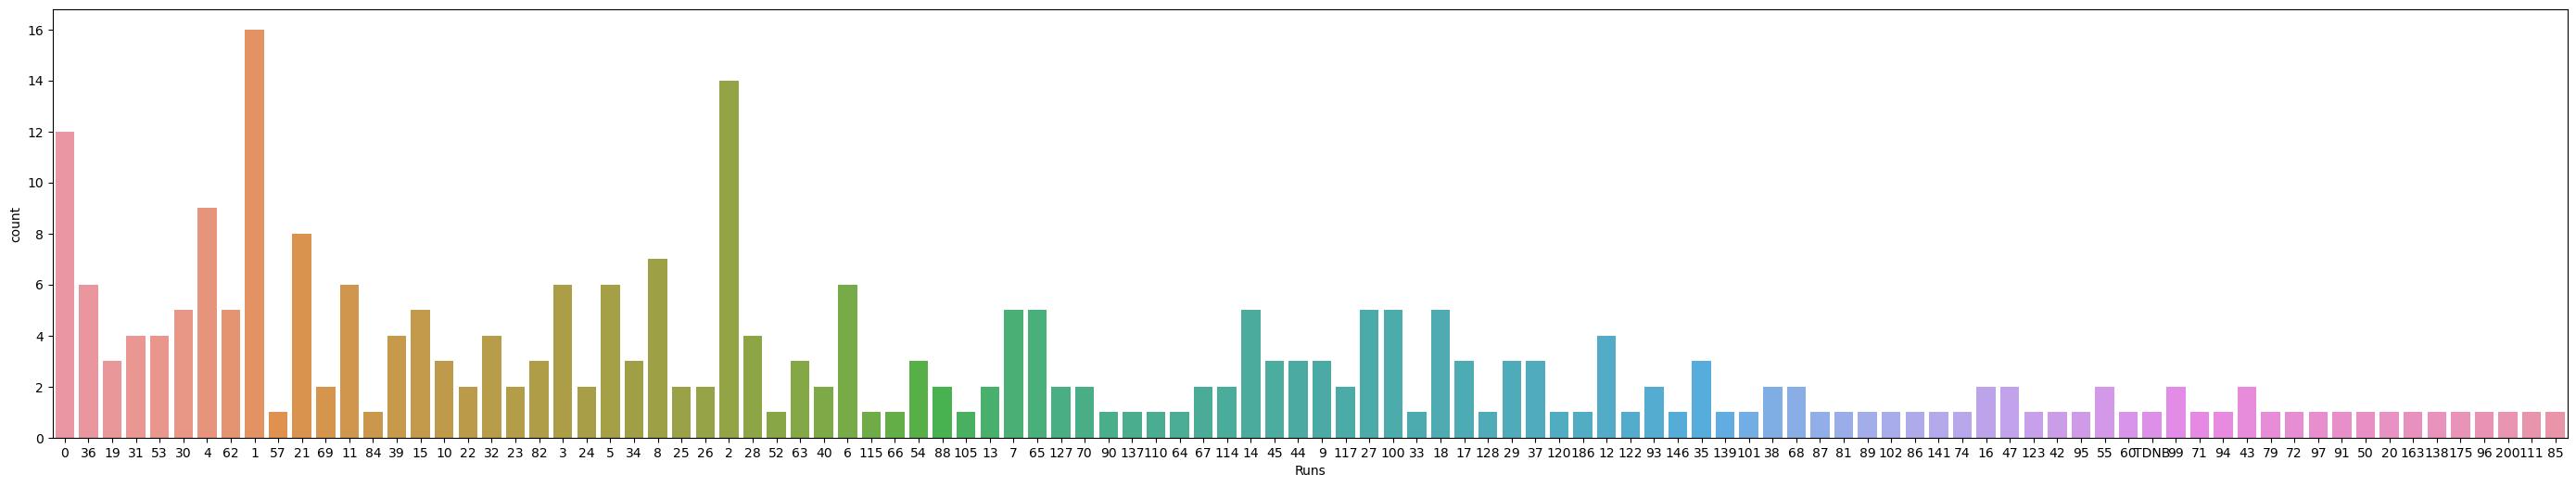

In [100]:
plt.figure(figsize=(35,6))
sns.countplot(x=df['Runs'])
plt.show()

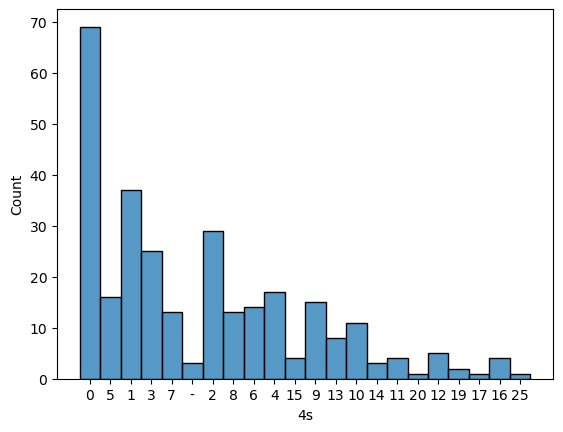

In [101]:
sns.histplot(x=df['4s'])
plt.show()